<img src="RandomForest.png" width="1200">

Reference  
[Blog](https://www.nikkei-r.co.jp/glossary/id=1599)  

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:, [2,3]]
y = iris.target

In [3]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/Users/takumkawahara/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [5]:
from Plot_decision_regions import PlotDecisionRegions 
plot_decision_regions = PlotDecisionRegions.plot_decision_regions

# Entropy 

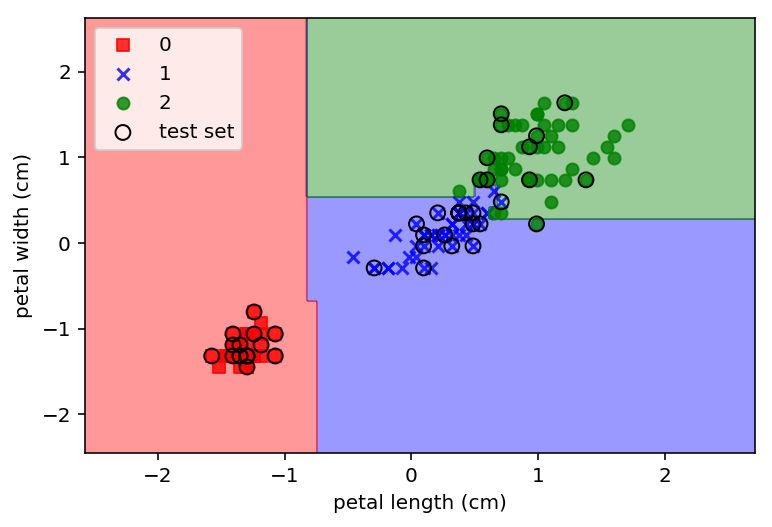

In [18]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, random_state=1, n_jobs=2)


forest.fit(X_train_std, y_train)
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.show()

In [19]:
print(np.round(forest.score(X_train_std, y_train),3)*100)
print(np.round(forest.score(X_test_std, y_test),3)*100)

99.0
95.6


# Gini Impurity

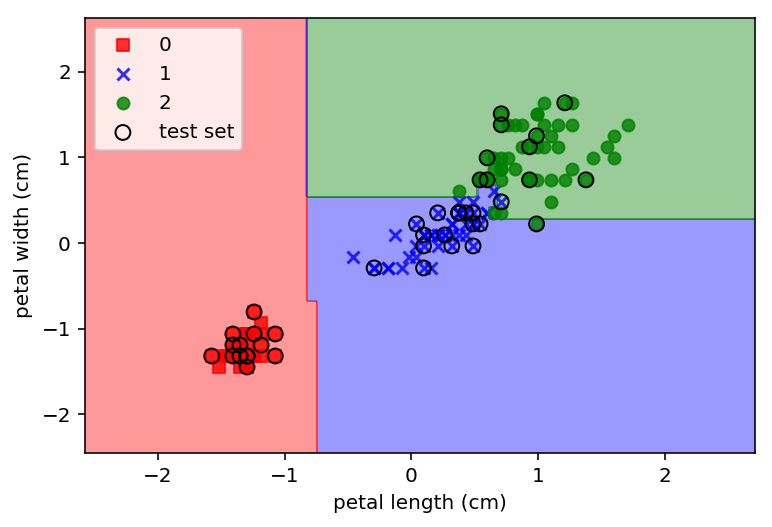

In [20]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=10, random_state=1, n_jobs=2)


forest.fit(X_train_std, y_train)
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.show()

In [21]:
print(np.round(forest.score(X_train_std, y_train),3)*100)
print(np.round(forest.score(X_test_std, y_test),3)*100)

99.0
95.6
